# Aula 5 - Análise de Dados

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [75]:
dados = pd.read_json('../bases/viajar.ndjson', lines=True)
dados = pd.json_normalize(dados['data'])

colunas_desejadas = ['id', 'desc', 'challenges', 'createTime', 'video.duration', 'video.cover', 'author.id',
                    'author.nickname', 'author.uniqueId','author.verified', 'music.title', 'authorStats.followingCount',
                    'authorStats.followerCount', 'authorStats.heartCount', 'authorStats.videoCount',
                    'authorStats.diggCount', 'authorStats.heart', 'statsV2.collectCount', 'statsV2.commentCount',
                    'statsV2.diggCount', 'statsV2.playCount', 'statsV2.shareCount']

dados = dados[colunas_desejadas]
dados['createTime'] = pd.to_datetime(dados['createTime'], unit='s')

dados['statsV2.diggCount'] = dados['statsV2.diggCount'].astype(float)
dados['statsV2.playCount'] = dados['statsV2.playCount'].astype(float)
dados['statsV2.shareCount'] = dados['statsV2.shareCount'].astype(float)
dados['statsV2.commentCount'] = dados['statsV2.commentCount'].astype(float)
dados['statsV2.collectCount'] = dados['statsV2.collectCount'].astype(float)

def preenche_url(item):
    return f"https://www.tiktok.com/@{item['author.uniqueId']}/video/{item['id']}"

dados['url'] = dados.apply(preenche_url, axis=1)

### Análise Exploratória 

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          593 non-null    object 
 1   desc                        593 non-null    object 
 2   challenges                  566 non-null    object 
 3   createTime                  593 non-null    object 
 4   video.duration              593 non-null    int64  
 5   video.cover                 593 non-null    object 
 6   author.id                   593 non-null    object 
 7   author.nickname             593 non-null    object 
 8   author.uniqueId             593 non-null    object 
 9   author.verified             593 non-null    bool   
 10  music.title                 593 non-null    object 
 11  authorStats.followingCount  593 non-null    int64  
 12  authorStats.followerCount   593 non-null    int64  
 13  authorStats.heartCount      593 non

In [9]:
dados.describe()

,video.duration,authorStats.followingCount,authorStats.followerCount,authorStats.heartCount,authorStats.videoCount,authorStats.diggCount,authorStats.heart,statsV2.collectCount,statsV2.commentCount,statsV2.diggCount,statsV2.playCount,statsV2.shareCount
count,593.000000,593.000000,5.930000e+02,5.930000e+02,593.000000,593.000000,5.930000e+02,464.000000,464.000000,4.640000e+02,4.640000e+02,464.000000
mean,17.328836,485.821248,2.798959e+05,8.139268e+06,352.910624,16134.512648,8.139268e+06,32966.765086,1175.224138,2.413211e+05,2.629089e+06,15061.500000
std,15.729925,1077.204472,1.102584e+06,3.652938e+07,551.473738,37967.985185,3.652938e+07,75542.792189,3451.409401,7.128670e+05,5.503858e+06,40136.281848
min,5.000000,0.000000,2.000000e+00,2.350000e+02,1.000000,0.000000,2.350000e+02,2.000000,0.000000,4.500000e+01,9.390000e+02,1.000000
25%,9.000000,51.000000,1.988000e+03,5.440000e+04,52.000000,793.000000,5.440000e+04,1359.000000,27.000000,3.961750e+03,2.102025e+05,688.500000
50%,12.000000,155.000000,1.160000e+04,5.103000e+05,166.000000,3504.000000,5.103000e+05,8463.000000,196.000000,3.942350e+04,8.476475e+05,3699.500000
75%,19.000000,429.000000,1.073000e+05,3.300000e+06,417.000000,14800.000000,3.300000e+06,29106.750000,832.250000,1.973135e+05,2.693163e+06,12229.250000
max,172.000000,9469.000000,1.180000e+07,6.135000e+08,6083.000000,556700.000000,6.135000e+08,809492.000000,37367.000000,1.116663e+07,7.211582e+07,546963.000000


In [10]:
n_linhas, n_colunas = dados.shape
print(f'A base tem {n_linhas} linhas e {n_colunas} colunas')

A base tem 593 linhas e 23 colunas


Text(0, 0.5, 'Número de vídeos')

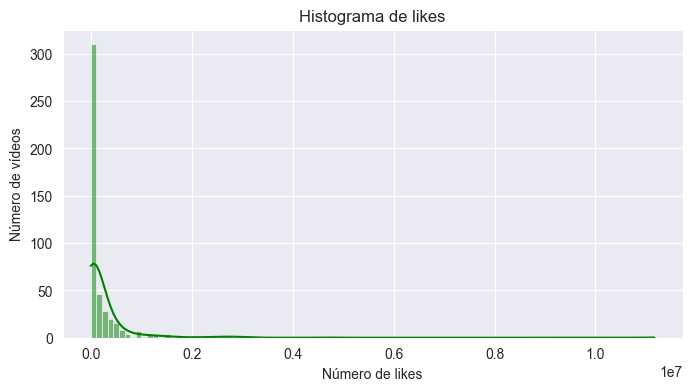

In [26]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
sns.histplot(data=dados, x='statsV2.diggCount', bins=100, kde=True, color='green')
plt.title('Histograma de likes')
plt.xlabel('Número de likes')
plt.ylabel('Número de vídeos')


Text(0, 0.5, 'Número de vídeos')

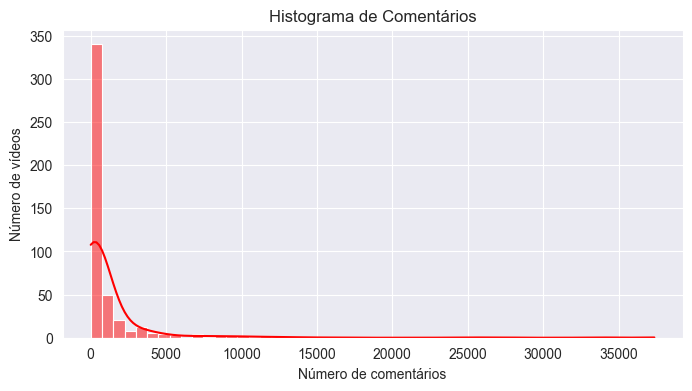

In [27]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
sns.histplot(data=dados, x='statsV2.commentCount', bins=50, kde=True, color='red')
plt.title('Histograma de Comentários')
plt.xlabel('Número de comentários')
plt.ylabel('Número de vídeos')

Text(0, 0.5, 'Número de vídeos')

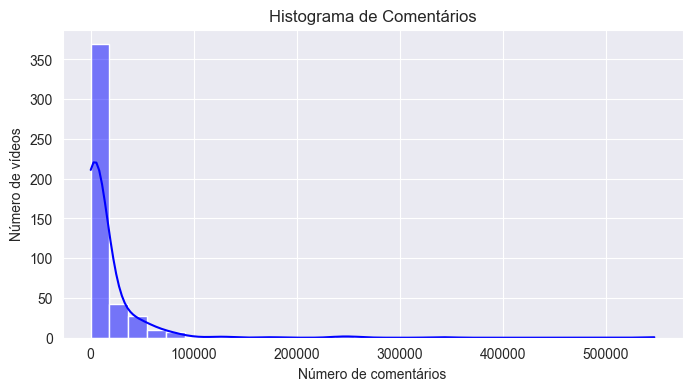

In [28]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
sns.histplot(data=dados, x='statsV2.shareCount', bins=30, kde=True, color='blue')
plt.title('Histograma de Comentários')
plt.xlabel('Número de comentários')
plt.ylabel('Número de vídeos')

Text(0, 0.5, 'Número de vídeos')

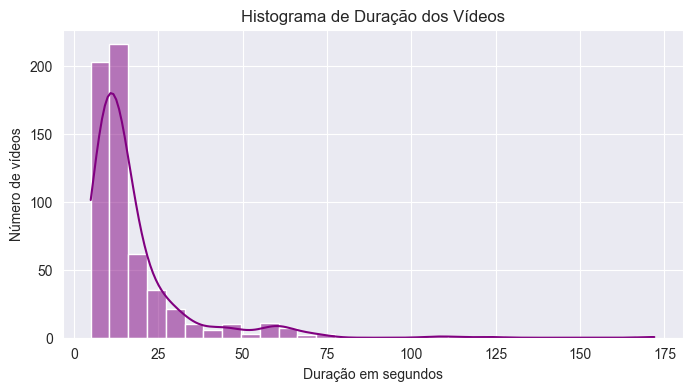

In [30]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
sns.histplot(data=dados, x='video.duration', bins=30, kde=True, color='purple')
plt.title('Histograma de Duração dos Vídeos')
plt.xlabel('Duração em segundos')
plt.ylabel('Número de vídeos')

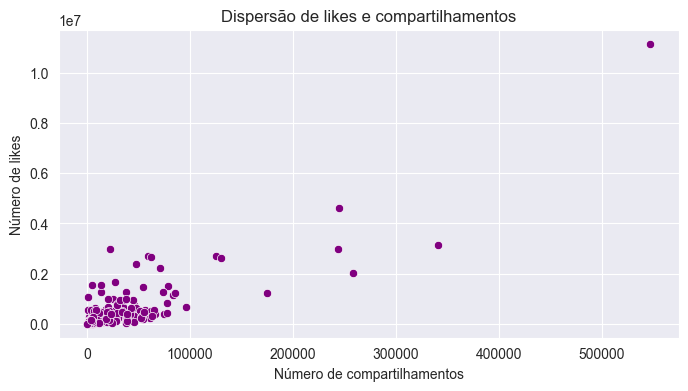

In [36]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=dados, x='statsV2.shareCount', y='statsV2.diggCount', color='purple')
plt.title('Dispersão de likes e compartilhamentos')
plt.xlabel('Número de compartilhamentos')
plt.ylabel('Número de likes')
plt.show()

(0.0, 400000.0)

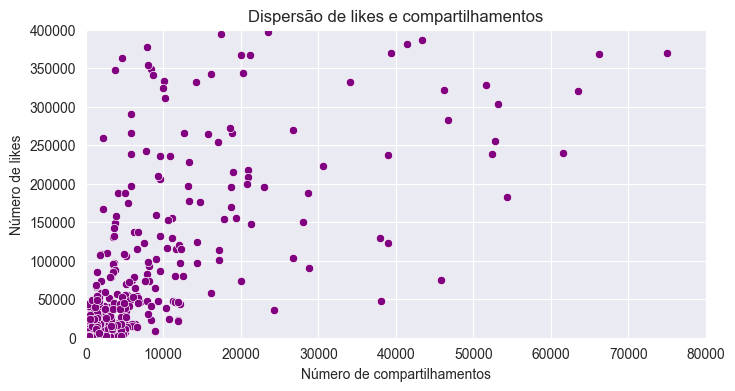

In [42]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=dados, x='statsV2.shareCount', y='statsV2.diggCount', color='purple')
plt.title('Dispersão de likes e compartilhamentos')
plt.xlabel('Número de compartilhamentos')
plt.ylabel('Número de likes')
plt.xlim(0, 80_000)
plt.ylim(0, 400_000)

Text(0, 0.5, 'Número de likes')

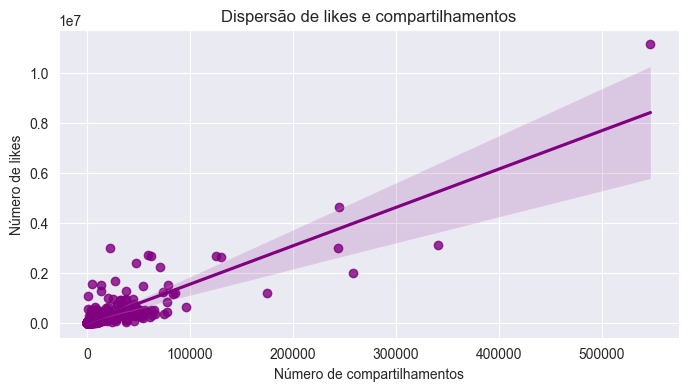

In [43]:
plt.figure(figsize=(8, 4))
sns.regplot(data=dados, x='statsV2.shareCount', y='statsV2.diggCount', color='purple')
plt.title('Dispersão de likes e compartilhamentos')
plt.xlabel('Número de compartilhamentos')
plt.ylabel('Número de likes')

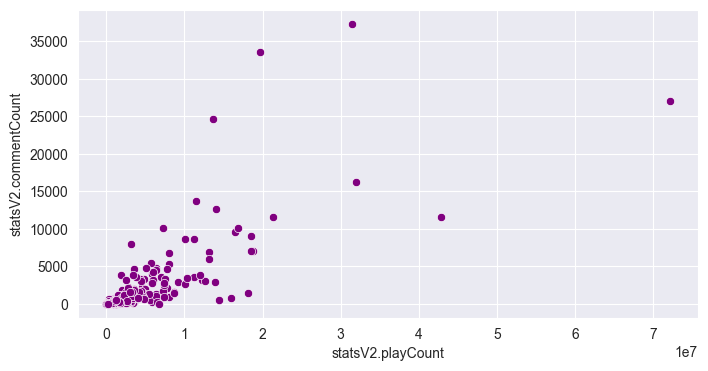

In [44]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=dados, x='statsV2.playCount', y='statsV2.commentCount', color='purple')
plt.show()

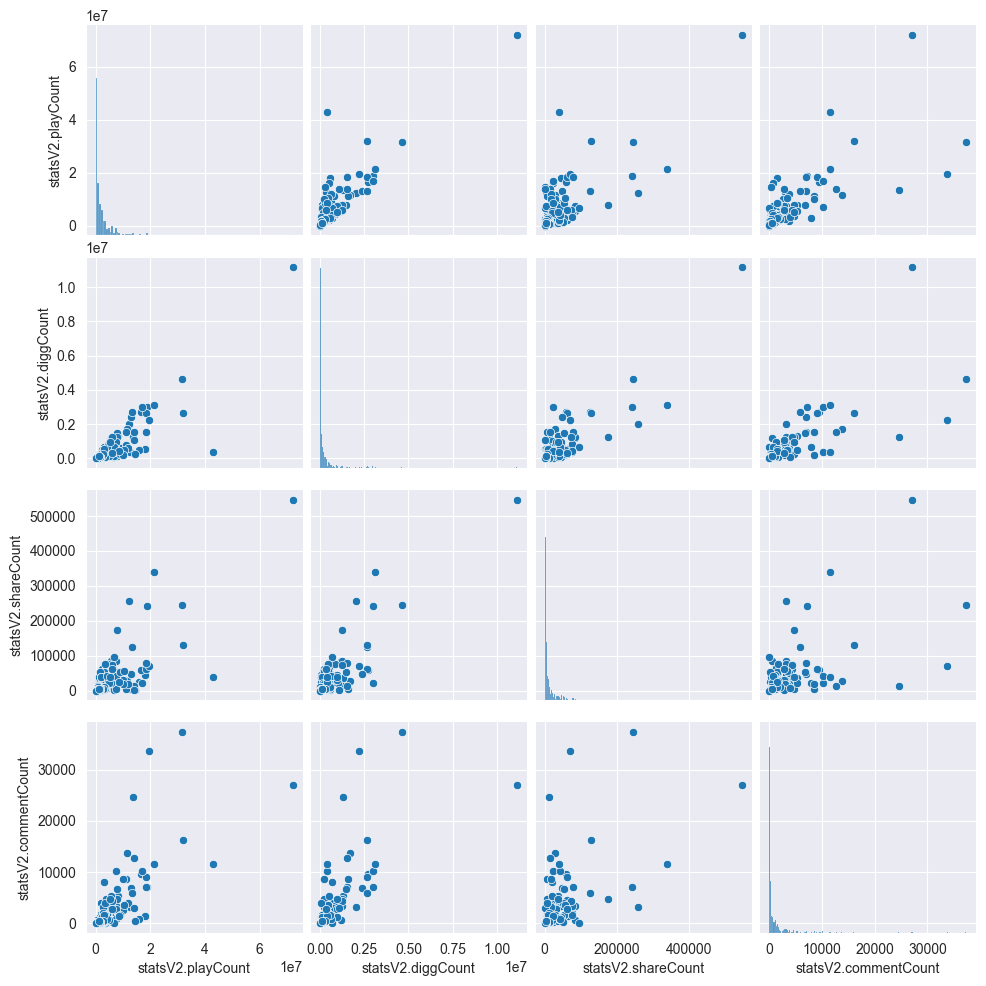

In [46]:
sns.pairplot(data=dados, vars=['statsV2.playCount', 'statsV2.diggCount', 'statsV2.shareCount', 'statsV2.commentCount'])


In [67]:
dados.groupby('author.uniqueId').agg({'statsV2.diggCount': 'mean',
                                        'statsV2.playCount': 'mean',
                                        'statsV2.shareCount': 'mean',
                                        'statsV2.commentCount': 'mean'}).sort_values(by='statsV2.diggCount', ascending=False).head(20)

,statsV2.diggCount,statsV2.playCount,statsV2.shareCount,statsV2.commentCount
author.uniqueId,,,,
mariona.roma,5.832260e+06,3.721325e+07,304415.000000,14393.000000
swissaround,4.624392e+06,3.148866e+07,244246.000000,37367.000000
madladsaf,3.127081e+06,2.129529e+07,340872.000000,11618.000000
carolinecdo,2.990268e+06,1.682315e+07,22887.000000,10143.000000
arixshah_,2.696028e+06,1.486074e+07,91881.000000,7744.000000
luxtravelbe,2.662568e+06,1.858236e+07,62340.000000,9072.000000
user7266752674160,2.633597e+06,3.197232e+07,129831.000000,16189.000000
rafaelamagacho,2.387004e+06,1.310227e+07,47686.000000,6963.000000
hannahloucox,2.219083e+06,1.964776e+07,70542.000000,33657.000000


## Se eu fosse a VoePass, quais influencers da lista eu usaria para fazer uma campanha de marketing em prol da empresa?

#### Tempo

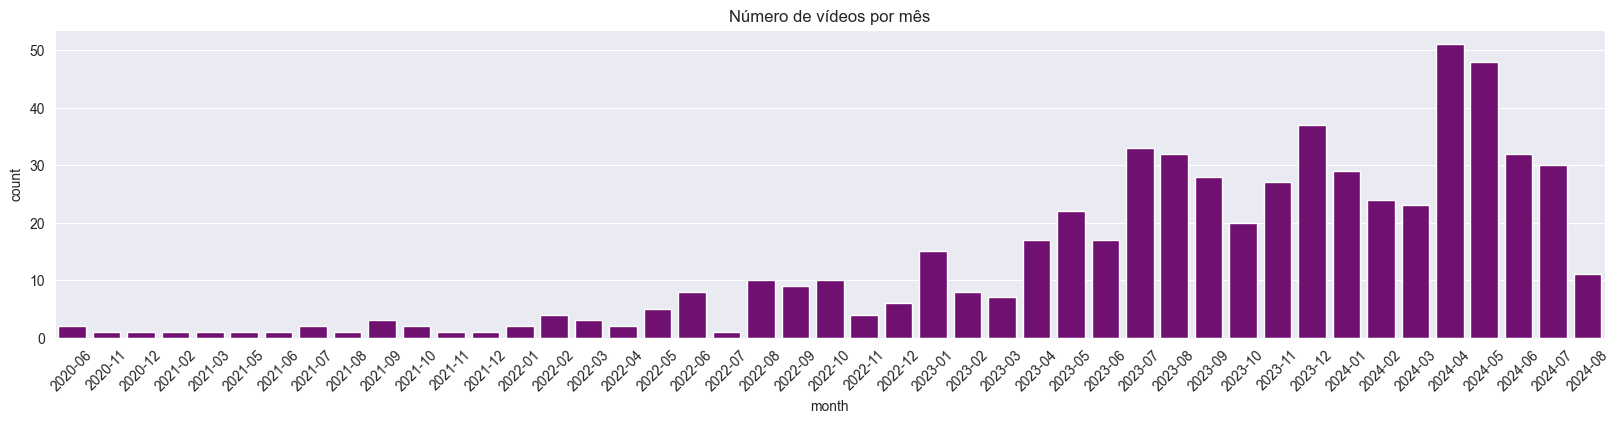

In [93]:
dados['month'] = dados['createTime'].dt.to_period('M')
plt.figure(figsize=(20, 4))
sns.countplot(x=dados.sort_values(by='month', ascending=True)['month'], color='purple')
plt.title('Número de vídeos por mês')
plt.xticks(rotation=45)
plt.show()

### Hashtags

In [97]:
def get_hashtags(lista):
  resultado = []
  try:
    for item in lista:
      resultado.append(item['title'])
    return resultado
  except:
    return resultado
  
dados['hashtags'] = dados['challenges'].apply(get_hashtags)

pd.DataFrame(Counter(dados['hashtags'].sum()).most_common(30))

,0,1
0,travel,190
1,fyp,136
2,viagem,101
3,traveltiktok,88
4,foryou,75
5,viajar,71
6,viral,61
7,trend,59
8,parati,49
9,viaje,48


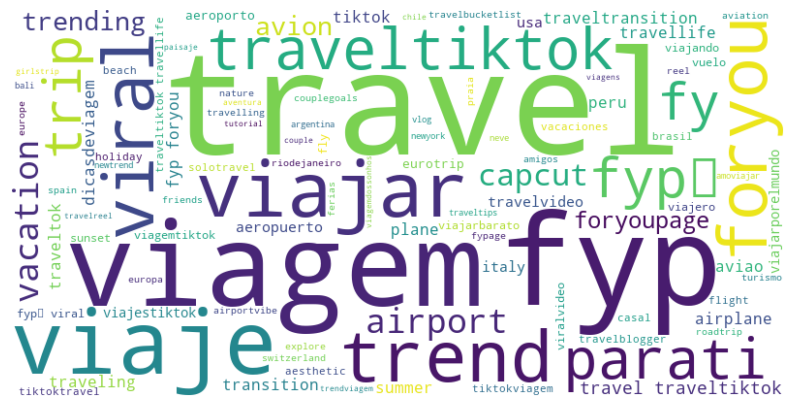

In [98]:
wordcloud = WordCloud(width=800, height=400, max_font_size=150, max_words=100, background_color='white').generate(' '.join(dados['hashtags'].sum()))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()